<a href="https://colab.research.google.com/github/vivekpenuli/DEEP-learning/blob/master/number_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
mnist = tf.keras.datasets.mnist #28*28 image of handwritten of 0-9 
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [4]:
print("Training Data Shape is {}".format(x_train.shape))
print("Training Labels Shape is {}".format(y_train.shape))
print("Testing Data Shape is {}".format(x_test.shape))
print("Testing Labels Shape is {}".format(y_test.shape))

Training Data Shape is (60000, 28, 28)
Training Labels Shape is (60000,)
Testing Data Shape is (10000, 28, 28)
Testing Labels Shape is (10000,)


In [5]:
print("Sample Training Data is {}".format(x_train[0]))

Sample Training Data is [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.       

In [6]:
print("Training Data after normalizing is {}".format(x_train[0]))
print("Testing  Data after normalizing is {}".format(x_test[0]))

Training Data after normalizing is [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # converts image to vector 28x28 = 754
model.add(tf.keras.layers.Dense(754,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(600,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # output layer softmax for probability distribution
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(x_train,y_train,epochs = 2 )
predictions = model.predict(x_test)

Epoch 1/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2060 - accuracy: 0.9381
Epoch 2/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0894 - accuracy: 0.9723


In [8]:
print("Probability distribution for a multi-class classification")
predictions[7]

Probability distribution for a multi-class classification


array([4.97241090e-05, 9.91471810e-04, 1.89256662e-05, 7.91452767e-04,
       5.07549522e-03, 4.16001712e-04, 1.57504257e-06, 1.04869111e-03,
       1.20098994e-04, 9.91486549e-01], dtype=float32)

In [9]:
print(np.argmax(predictions[7]))

9


In [10]:
print(np.argmax(predictions[7]))

9


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0955 - accuracy: 0.9720
0.09551894664764404 0.972000002861023


In [13]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving vivek.jpg to vivek.jpg
User uploaded file "vivek.jpg" with length 58844 bytes


In [0]:
from google.colab.patches import cv2_imshow

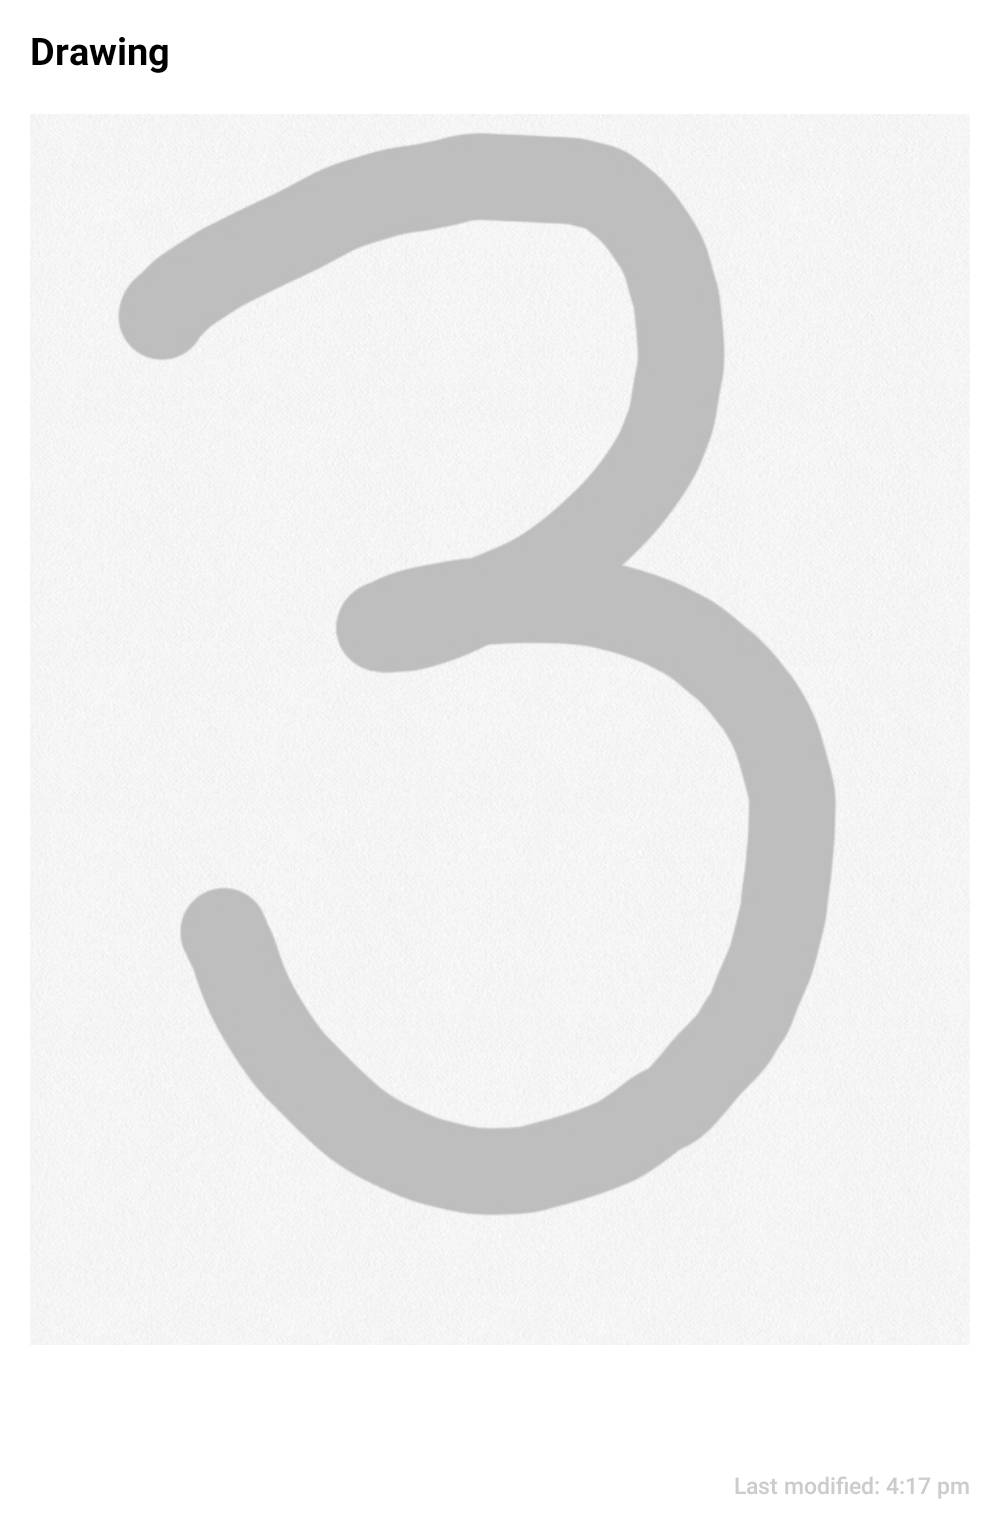

In [15]:
import cv2
img_array = cv2.imread('vivek.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img_array)

1530000


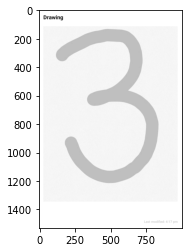

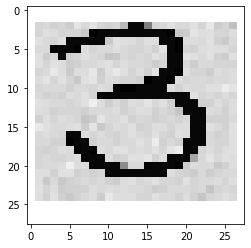

Probability Distribution for 0 0.25571847
Probability Distribution for 1 0.011234517
Probability Distribution for 2 0.058478445
Probability Distribution for 3 0.32546163
Probability Distribution for 4 0.009944336
Probability Distribution for 5 0.11296893
Probability Distribution for 6 0.03788814
Probability Distribution for 7 0.011691666
Probability Distribution for 8 0.13328768
Probability Distribution for 9 0.043326166
The Predicted Value is 3


In [16]:





img_array = cv2.imread("vivek.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
predicted = model.predict(np.array([[user_test]]))
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))

In [17]:
print(np.argmax(predicted[0]))

3


In [0]:
Newpredictions = model.predict(np.array([user_test]))

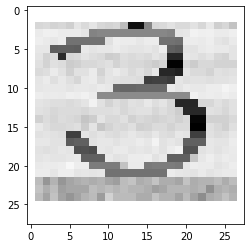

In [19]:
plt.imshow(user_test, cmap = plt.cm.binary)
plt.show()

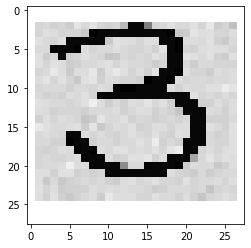

In [20]:
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()